In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('market_file.csv', sep = ',')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<h1 style='background-color:#B7EBA7'>Ячейка с кодом</h1>

In [9]:
class BasePlot:
    default_figure = (10, 6)
    
    def __init__(self, df, column, bins, kde, color, palette, howcolor=True):
        self.df = df
        self.column = column
        self.bins = bins
        self.kde = kde
        self.color = color
        self.palette = palette
        self.howcolor = howcolor

    def plot(self):
        plt.figure(figsize=self.default_figure)
        self.create_plot()
        plt.ylabel('count')
        plt.xlabel(self.column)
        self.set_title()
        plt.show()

    def set_title(self):
        plt.title(f'График для {self.column}')


class LowIntPlot(BasePlot):
    def create_plot(self):
        sns.countplot(
            data=self.df, 
            x=self.column, 
            color=None if self.howcolor else self.color, 
            palette=self.palette if self.howcolor else None, 
            alpha=0.6, 
            edgecolor='black', 
            linewidth=1.2
        )

    def set_title(self):
        plt.title(f'Гистограмма для {self.column}')


class ManyIntFloatPlot(BasePlot):
    def create_plot(self):
        sns.histplot(
            data=self.df, 
            x=self.column, 
            bins=self.bins, 
            kde=self.kde, 
            color=self.color, 
            alpha=0.6, 
            edgecolor='black', 
            linewidth=1.2
        )

    def set_title(self):
        plt.title(f'График распределения для {self.column}')


class ObjectPlot(BasePlot):
    def __init__(self, df, column, procent, bins, kde, color, palette, howcolor=True):
        super().__init__(df, column, bins, kde, color, palette, howcolor)
        self.procent = procent
    
    def create_plot(self):
        unique_vals = self.df[self.column].nunique()
        if unique_vals <= 18:
            self.single_plot()
        else:
            self.double_plot()

    def single_plot(self):
        table = self.df.pivot_table(index=self.column, values=self.df.columns[0], aggfunc='count')
        table.columns = ['count']
        table = table.sort_values(by='count', ascending=True)
        table['percentage'] = ((table['count'] / table['count'].sum()) * 100).round(1)

        sns.barplot(
            x=table.index.values, 
            y=table['count'], 
            color=None if self.howcolor else self.color, 
            palette=self.palette if self.howcolor else None, 
            alpha=0.6, 
            edgecolor='black', 
            linewidth=1.2
        )
        
        plt.xticks(rotation=45)
        if self.procent:
            for index, value in enumerate(table['percentage']):
                plt.text(index, value, f'{value}%', ha='center')

    def double_plot(self):
        table = self.df.pivot_table(index=self.column, values=self.df.columns[0], aggfunc='count')
        table.columns = ['count']
        table = table.sort_values(by='count', ascending=True)
        table['percentage'] = ((table['count'] / table['count'].sum()) * 100).round(1)
        table_first_9 = table.iloc[:9]
        table_last_9 = table.iloc[-9:]
        max_count = max(table_first_9['count'].max(), table_last_9['count'].max())
        fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
        sns.barplot(
            ax=axes[0],
            x=table_first_9.index.values, 
            y=table_first_9['count'], 
            color=None if self.howcolor else self.color, 
            palette=self.palette if self.howcolor else None, 
            alpha=0.6, 
            edgecolor='black', 
            linewidth=1.2
        )
        axes[0].set_ylim(0, max_count)
        axes[0].set_title('Первые 9 значений')
        axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
        if self.procent:
            for index, value in enumerate(table_first_9['percentage']):
                axes[0].text(index, value, f'{value}%', ha='center')
        sns.barplot(
            ax=axes[1],
            x=table_last_9.index.values, 
            y=table_last_9['count'], 
            color=None if self.howcolor else self.color, 
            palette=self.palette if self.howcolor else None, 
            alpha=0.6, 
            edgecolor='black', 
            linewidth=1.2
        )
        axes[1].set_ylim(0, max_count) 
        axes[1].set_title('Последние 9 значений')
        axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
        if self.procent:
            for index, value in enumerate(table_last_9['percentage']):
                axes[1].text(index, value, f'{value}%', ha='center')

    def set_title(self):
        plt.suptitle(f'Столбчатая диаграмма для {self.column}', fontsize=16)



def eda_plots(df_train, procent=True, intborder=50, howcolor=True, color='#4B0082', palette=['#4B0082', '#6A0DAD', '#8A2BE2', '#B03060', '#D2691E', '#FF4500', '#FF6347', '#FF8C00', '#FFD700', '#FFE4B5'], kde=True, bins=50, ignore=True):
    """
    Функция для построения графиков различных типов на основе данных в DataFrame.

    Входные параметры:
    - df_train: DataFrame (входной датасет, который содержит данные для построения графиков)
    - procent: bool (отображение процентов на столбчатых диаграммах; по умолчанию True)
    - intborder: int (разделитель по количеству уникальных значений для числовых столбцов типа int; 
      столбцы с количеством уникальных значений меньше intborder визуализируются как countplot, 
      с количеством больше intborder — как гистограммы; по умолчанию 50)
    - howcolor: bool (использование одного цвета или палитры цветов; 
      True - используется палитра `palette`, False - используется один цвет `color`; по умолчанию True)
    - color: str (основной цвет графиков; по умолчанию '#4B0082')
    - palette: list (цветовая палитра для графиков, используется если howcolor=True; 
      по умолчанию ['#4B0082', '#6A0DAD', '#8A2BE2', '#B03060', '#D2691E', '#FF4500', '#FF6347', '#FF8C00', '#FFD700', '#FFE4B5'])
    - kde: bool (включение или отключение линии KDE на графиках распределения; по умолчанию True)
    - bins: int (количество ячеек для гистограмм распределения; по умолчанию 50)
    - ignore: bool/list (список колонок для игнорирования при построении графиков:
        - False: используются все колонки,
        - True: игнорируется колонка 'id', если она присутствует (регистр не учитывается),
        - list: передается список с колонками, которые следует игнорировать;
      по умолчанию True)

    Функция проходит по всем колонкам в df_train, определяет их тип и на основе этого строит соответствующий график:
    - Для числовых столбцов с типом int и количеством уникальных значений меньше intborder строится countplot.
    - Для числовых столбцов с типом int и количеством уникальных значений больше intborder, а также для всех float столбцов, строится гистограмма с возможностью добавления KDE.
    - Для столбцов типа object строится столбчатая диаграмма с возможностью отображения процентов.

    """
    df_train.columns = df_train.columns.str.lower()
    columns = [] if ignore == False else ([col for col in ['id', 'index', 'key'] if col in df_train.columns]) if ignore == True else ignore
    for column in df_train.drop(columns=columns).columns:
        if df_train[column].dtype == 'int64' and len(df_train[column].unique()) < intborder:
            plotter = LowIntPlot(df_train, column, bins, kde, color, palette, howcolor)
            plotter.plot()
        elif df_train[column].dtype == 'int64' and len(df_train[column].unique()) > intborder:
            plotter = ManyIntFloatPlot(df_train, column, bins, kde, color, palette, howcolor)
            plotter.plot()
        elif df_train[column].dtype == 'float64':
            plotter = ManyIntFloatPlot(df_train, column, bins, kde, color, palette, howcolor)
            plotter.plot()
        elif df_train[column].dtype == 'object':
            plotter = ObjectPlot(df_train, column, procent, bins, kde, color, palette, howcolor)
            plotter.plot()
        else:
            continue

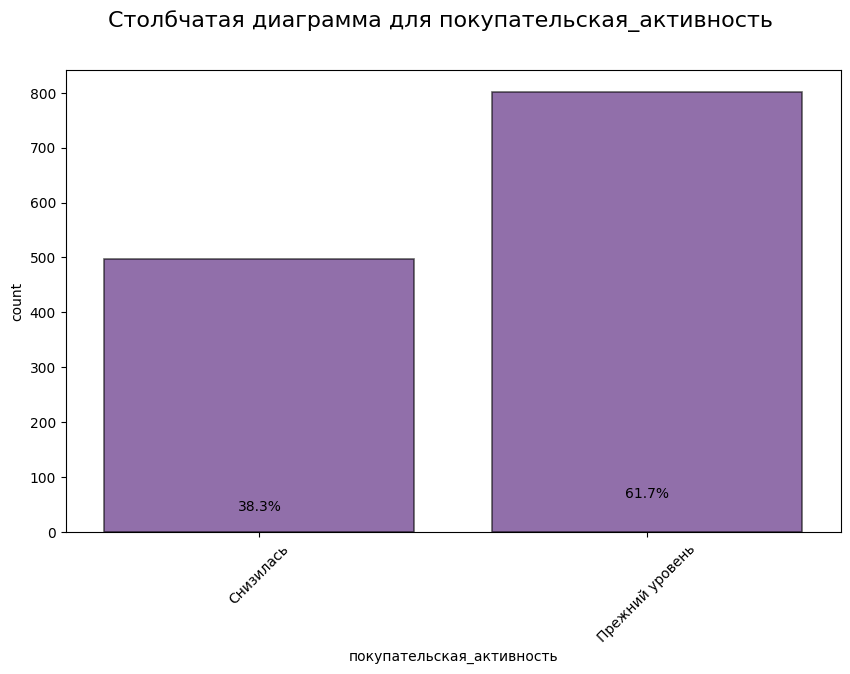

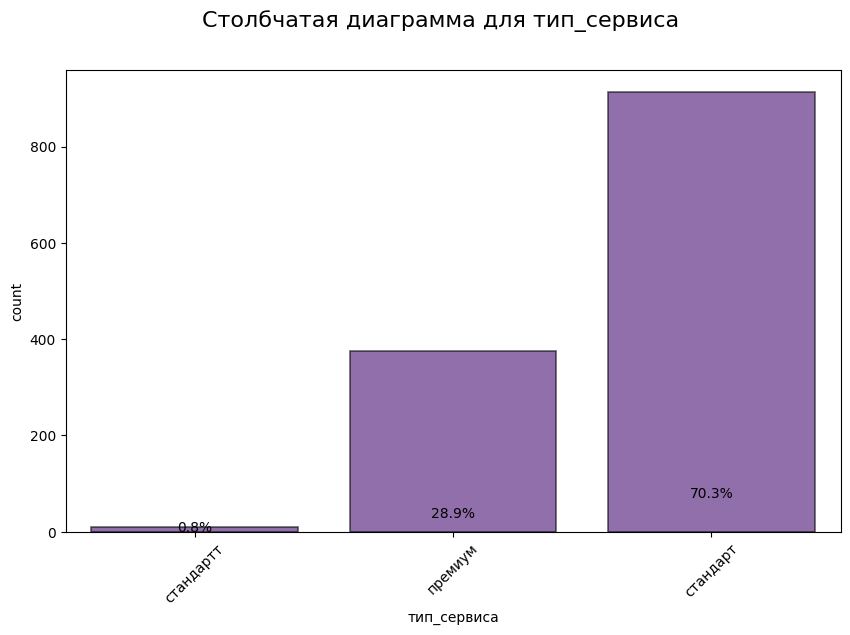

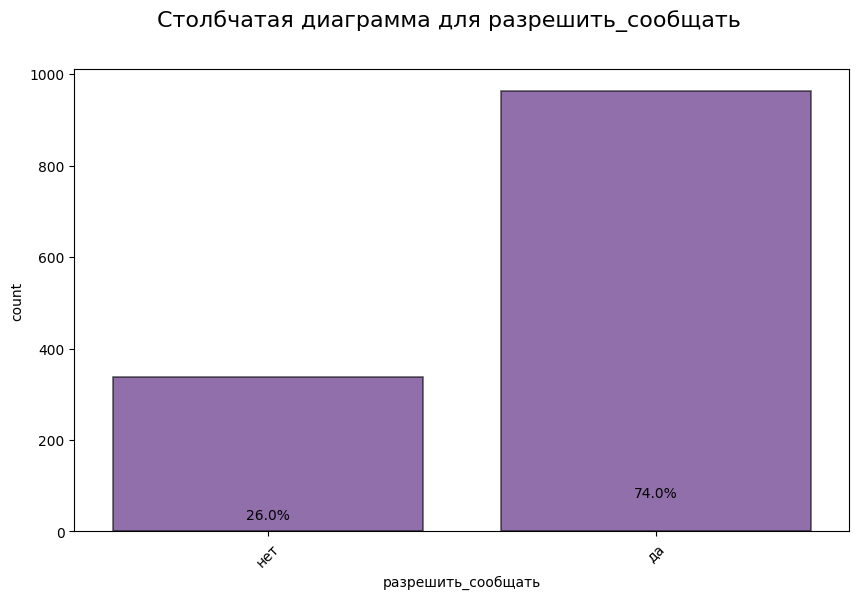

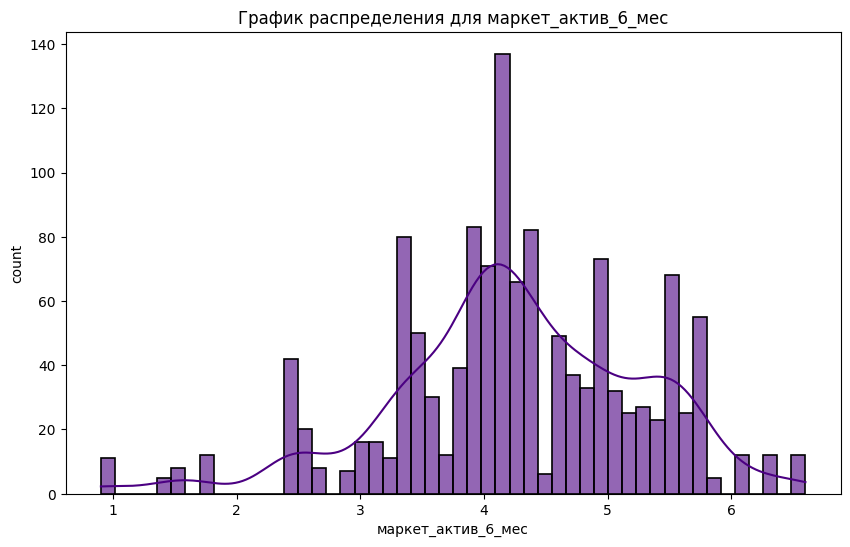

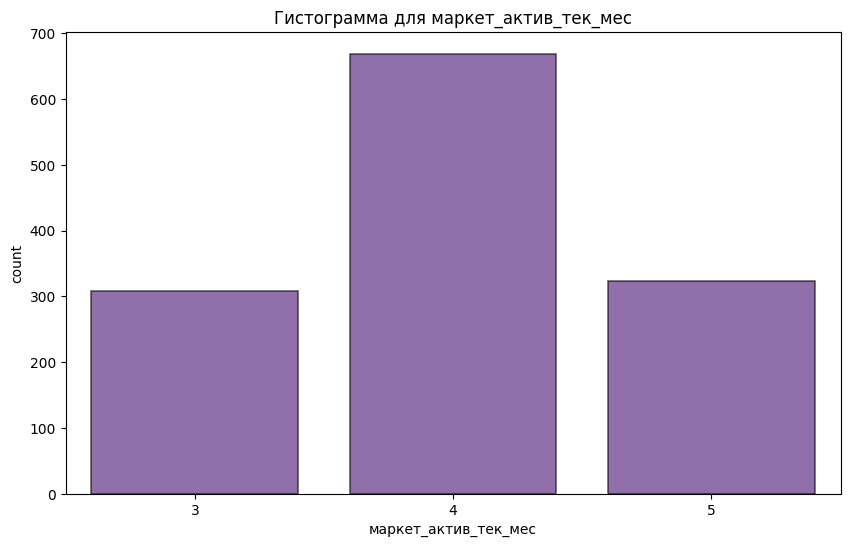

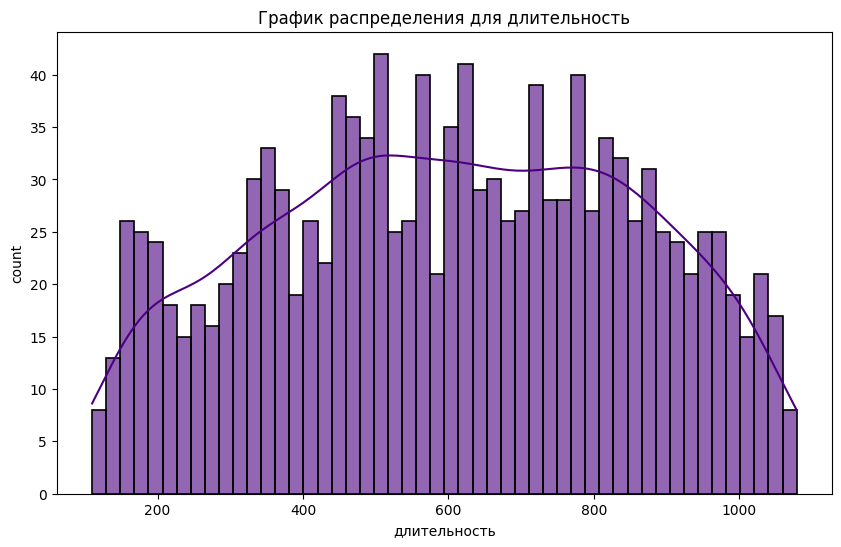

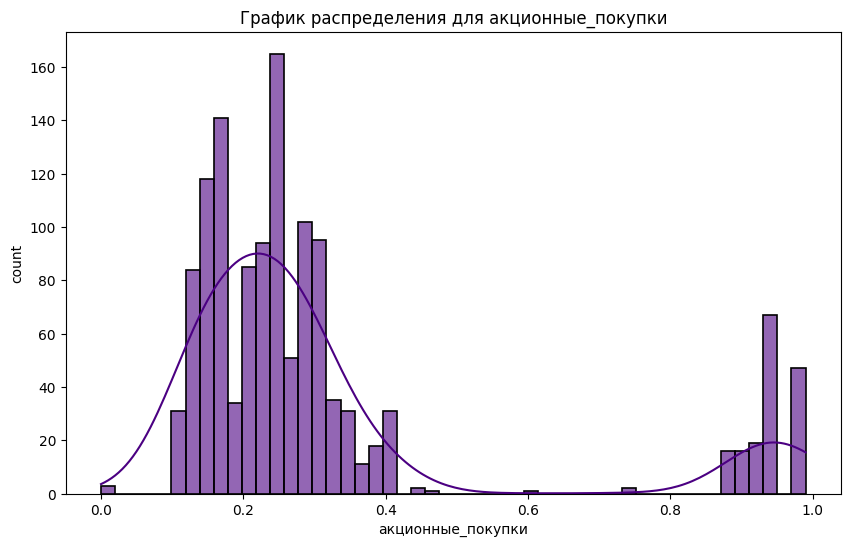

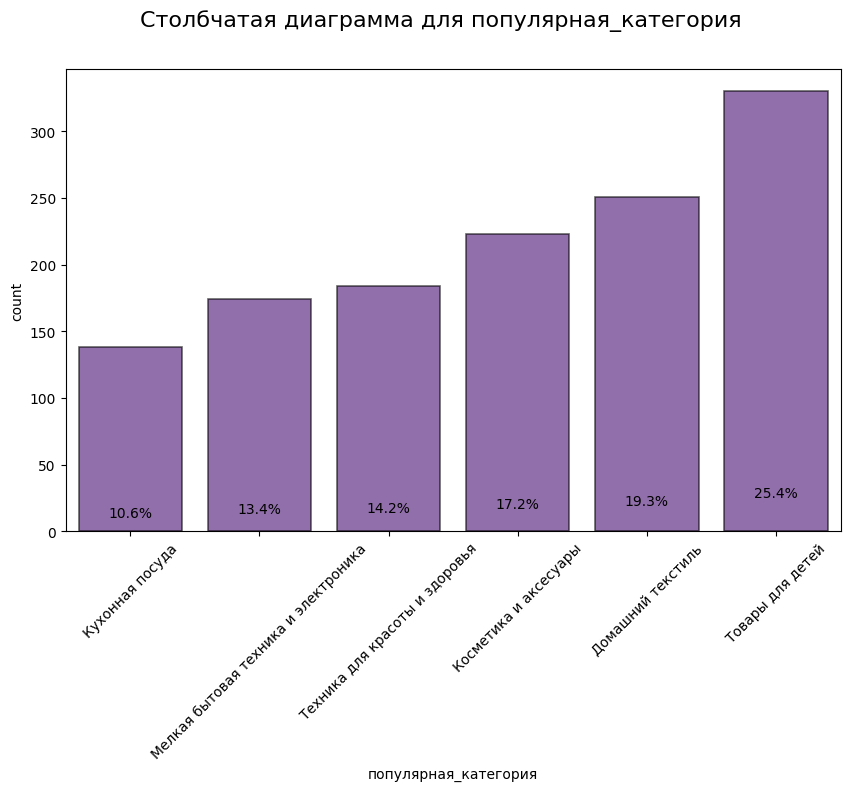

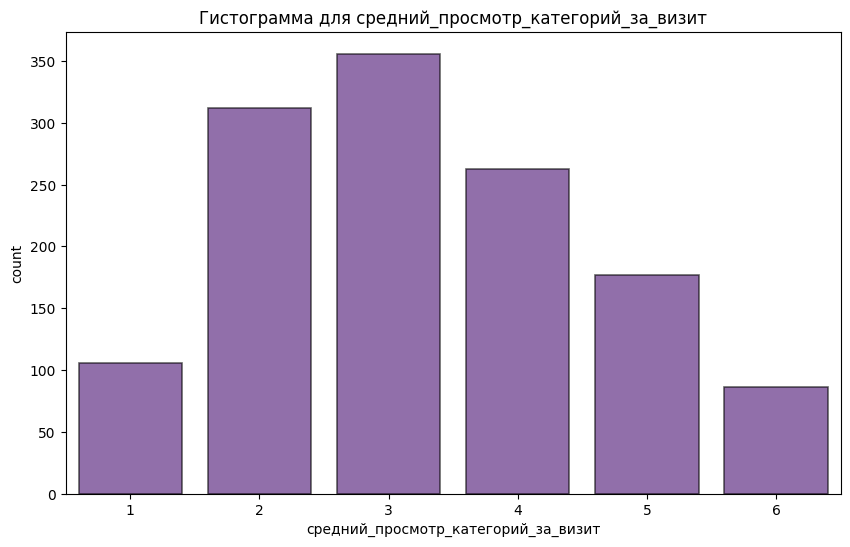

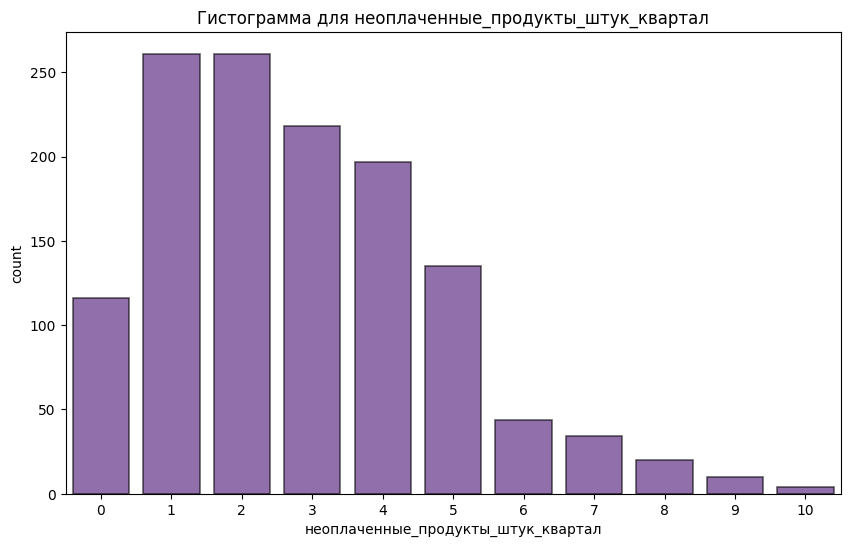

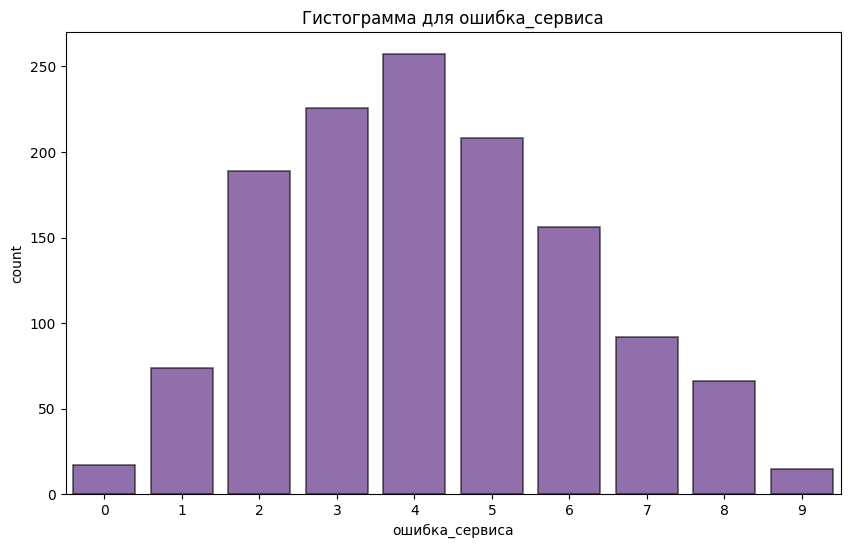

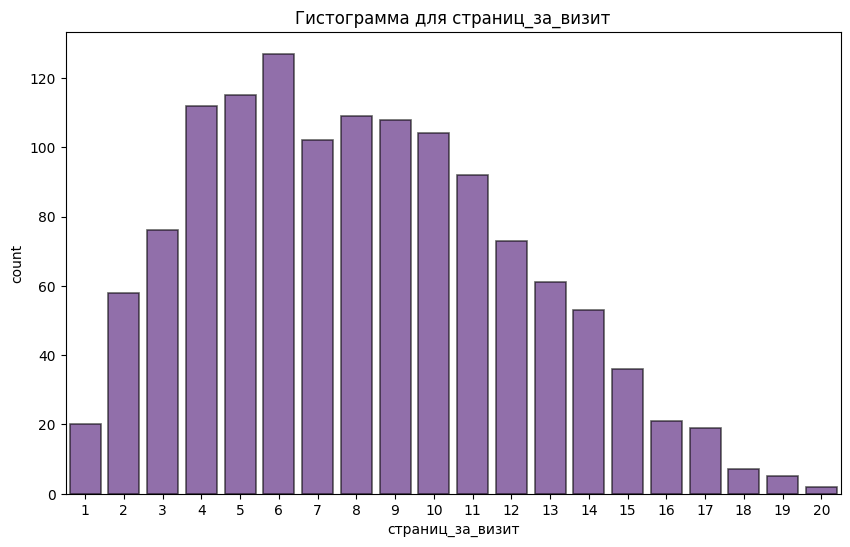

In [10]:
eda_plots(df, ignore=True, howcolor=False, procent=True)